## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 1

### Q1. Using the Iris Flowers Dataset, build and Neural Network with the following specifications to perform multi-class classification. 
### • Split the Data into Training: Validation: Testing 
### • Number of Hidden Layers = 2, containing 8 Neurons and 4 Nuerons 
### • Use RELU activation function in the hidden layers, choose the optimizer as ADAM and set learning rate to be equal to 0.1.

In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [20]:
df = pd.read_csv("iris.csv",header= None)
df.columns = ["feat1", "feat2", "feat3", "feat4", "output"]
df.head()

,feat1,feat2,feat3,feat4,output
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.describe()

,feat1,feat2,feat3,feat4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

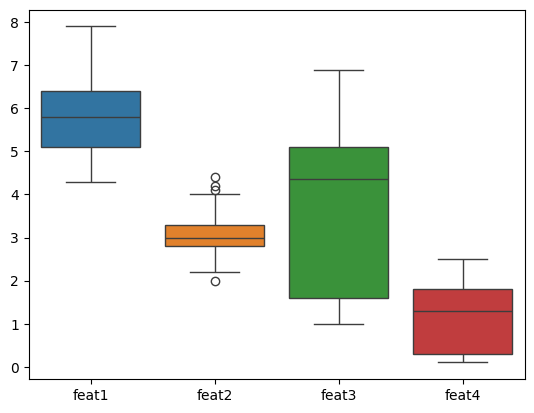

In [22]:
sns.boxplot(df)

In [23]:
def remOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    return df[(df[col] < upper) & (df[col] > lower)]

In [24]:
feat = ["feat1", "feat2", "feat3", "feat4"]
print("Old Shape: ", df.shape)

for col in feat:
    df = remOutliers(df, col)

print("New Shape: ", df.shape)

Old Shape:  (150, 5)
New Shape:  (146, 5)


In [25]:
scaler = preprocessing.MinMaxScaler()
df[feat] = scaler.fit_transform(df[feat])

df.head()

,feat1,feat2,feat3,feat4,output
0,0.222222,0.722222,0.067797,0.041667,Iris-setosa
1,0.166667,0.444444,0.067797,0.041667,Iris-setosa
2,0.111111,0.555556,0.050847,0.041667,Iris-setosa
3,0.083333,0.500000,0.084746,0.041667,Iris-setosa
4,0.194444,0.777778,0.067797,0.041667,Iris-setosa


In [26]:
label_encoder = preprocessing.LabelEncoder()
df['output']= label_encoder.fit_transform(df['output']) 

df['output'].value_counts()

output
2    50
1    49
0    47
Name: count, dtype: int64

<Axes: >

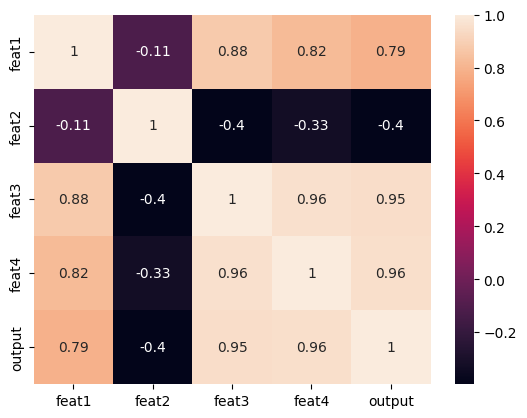

In [27]:
sns.heatmap(df.corr(), annot=True)

In [28]:
x = df.drop('output',axis=1)
y = df['output']

x_train, x_test, y_train, y_test = train_test_split(x, y , random_state=104,test_size=0.2, shuffle=True)

In [29]:
model = Sequential([
    Input(shape=(x_train.shape[1],), name='input'),
    Dense(8, activation='relu', name='hidden1'),
    Dense(4, activation='relu', name='hidden2'),
    Dense(3, activation='softmax', name='output')
])

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras.optimizers import Adam
optimizer =  Adam(learning_rate = 0.1)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
epochs = 50
batch_size = 32
h = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2455 - loss: 1.1635 - val_accuracy: 0.4167 - val_loss: 1.0342
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3160 - loss: 1.0227 - val_accuracy: 0.4167 - val_loss: 0.9622
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6518 - loss: 0.8481 - val_accuracy: 0.4167 - val_loss: 0.7980
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6632 - loss: 0.6742 - val_accuracy: 0.4167 - val_loss: 0.7022
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6900 - loss: 0.5693 - val_accuracy: 0.4167 - val_loss: 0.6050
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6709 - loss: 0.5265 - val_accuracy: 0.8333 - val_loss: 0.5244
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6779 - loss: 0.5170 - val_accuracy: 0.8333 - val_loss: 0.4899
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6800 - loss: 0.5186 - val_accuracy: 0.8333 - val_loss: 0.4791
Epoch 9

In [33]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6000 - loss: 0.4220
Test Loss: 0.4219697117805481
Test Accuracy: 0.6000000238418579
